In [1]:
import pandas as pd
import re

data = pd.read_csv('listings-all.csv', usecols=[i for i in range(71)])

cols = ['id', 'name',
        'neighbourhood_cleansed',
        'neighbourhood_group_cleansed','zipcode',
        'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type',
        'price']

df = data[cols].dropna().reset_index(drop=True) 

clean_price = lambda x: int(re.sub('\W','',x[1:-3]))
df['price'] = df['price'].apply(clean_price) 

/Users/sb/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(df.head()) 

     id                                       name neighbourhood_cleansed  \
0  2595                      Skylit Midtown Castle                Midtown   
1  3831            Cozy Entire Floor of Brownstone           Clinton Hill   
2  5099  Large Cozy 1 BR Apartment In Midtown East            Murray Hill   
3  5178           Large Furnished Room Near B'way          Hell's Kitchen   
4  5203         Cozy Clean Guest Room - Family Apt        Upper West Side   

  neighbourhood_group_cleansed zipcode property_type        room_type  \
0                    Manhattan   10018     Apartment  Entire home/apt   
1                     Brooklyn   11238   Guest suite  Entire home/apt   
2                    Manhattan   10016     Apartment  Entire home/apt   
3                    Manhattan   10019     Apartment     Private room   
4                    Manhattan   10025     Apartment     Private room   

   accommodates  bathrooms  bedrooms  beds  bed_type  price  
0             1        1.0       0.0

In [3]:
burroughs = df.neighbourhood_group_cleansed.unique().tolist()
counter = lambda x: df[df.neighbourhood_group_cleansed==x].id.count()
counts = [counter(i) for i in burroughs]

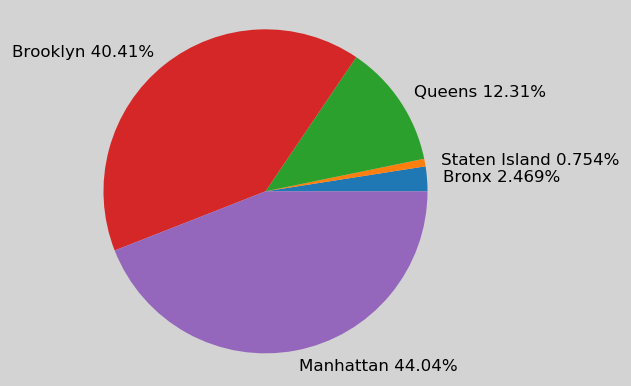

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(5,4), dpi=120, facecolor='lightgrey')
labels = [''.join([b,' ',str(100*counts[i]/len(df))[:5], '%']) for i,b in enumerate(burroughs)]
plt.pie(counts[::-1], labels=labels[::-1] )
plt.axis('equal')
plt.show() 

/Users/sb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


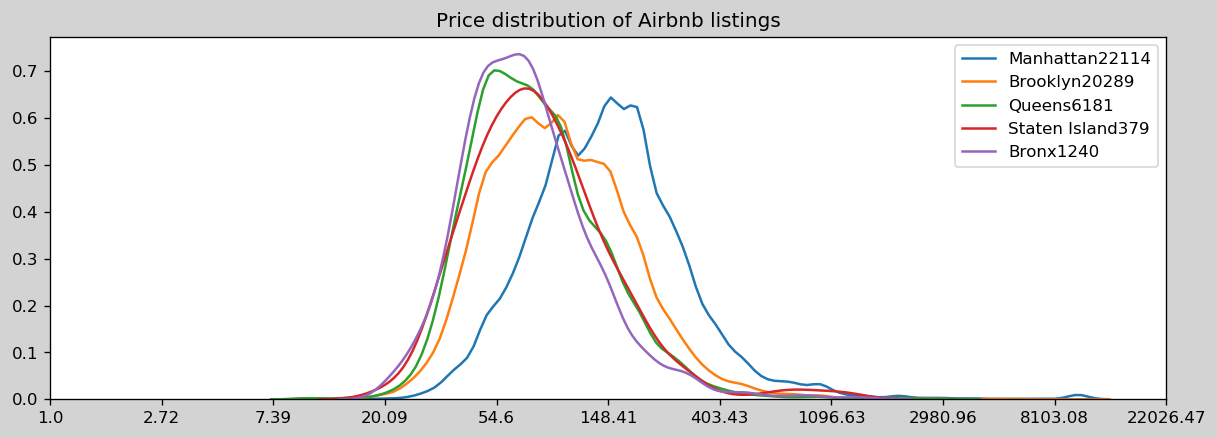

In [25]:
import numpy as np

plt.figure(figsize=(12,4), dpi=120, facecolor='lightgrey')

ax=plt.subplot()
ax.set_xlim([0,10])
ax.set_xticks([i for i in range(11)])
ax.set_xticklabels([round(np.exp(i),2) for i in range(11)])
ax.set_title('Price distribution of Airbnb listings')


for burrough in burroughs:
    X = np.log(df[df.neighbourhood_group_cleansed==burrough].price.values)
    sns.kdeplot(X, "%s , %.2d"(burrough,len(X));
# sns.kdeplot(np.log(df[df.neighbourhood_group_cleansed=="Brooklyn"].price.values),label="Brooklyn");
# sns.kdeplot(np.log(df[df.neighbourhood_group_cleansed=="Bronx"].price.values),label="The Bronx");
# sns.kdeplot(np.log(df[df.neighbourhood_group_cleansed=="Queens"].price.values),label="Queens"+str(len()));
# sns.kdeplot(np.log(df[df.neighbourhood_group_cleansed=="Staten Island"].price.values),label="Staten Island");

In [ ]:
extra_data = pd.read_csv('listings-all.csv', usecols=[i for i in range(60,70)])

In [ ]:
extra_data = pd.read_csv('listings-all.csv', usecols=[i for i in range(60,70)])
extra_data.head()


In [ ]:
from scipy.stats import norm
mean,std = norm.fit(df[df.price>0].price.values) 
xmin,xmax=plt.xlim()
x = np.linspace(xmin,xmax,100)
y = norm.pdf(x,mean,std)
plt.plot(x,y)

In [ ]:

import plotly.express as px

df = px.data.gapminder()

px.scatter(df,
           x='gdpPercap',
           y='lifeExp',
           animation_frame='year',
           animation_group='country',
           size='pop',
           color='continent',
           hover_name='country',
           log_x=True, size_max=55,
           range_x=[100,100000],
           range_y=[25,90]
          )
